In [1]:
import plotly.graph_objects as go
import numpy as np

In [58]:

data = {
    "1_R69": [0.0012, 0.00001, 0.28567, 0.7258, 0.94854],
    "2_M75": [0.15238, 0.00001, 0.00001, 0.94156, 0.33724],
    "3_A78": [0.94156, 0.00027, 0.00001, 0.95456, 0.10648],
    "4_I159": [0.92574, 0.7578, 0.21438, 0.00001, 0.83476],
    "5_L202": [0.00001, 0.26143, 0.00005, 0.91519, 0.14745],
    "6_K204": [0.00001, 0.99942, 0.00339, 0.00013, 0.0116],
    "7_E206": [0.00001, 0.53191, 0.00339, 0.10648, 0.00036],
    "8_F207": [0.00001, 0.99942, 0.07355, 0.0116, 0.0013],
    "9_A254": [0.00001, 0.00001, 0.46479, 0.00001, 0.94156],
    "10_R255": [0.00116, 0.19417, 0.42886, 0.00005, 0.90924],
    "11_L258": [0.00183, 0.99451, 0.06504, 0.0071, 0.71756],
    "12_Q260": [0.47778, 0.99416, 0.28567, 0.64089, 0.94156],
    "13_A261": [0.00016, 0.01354, 0.59825, 0.01328, 0.26143]
}

# Formatting function
def format_pvalue(p):
    if p <= 0.00001:
        return '<10<sup>-5</sup>'
    elif p<0.001 and p>0.00001:
        return '<10<sup>-3</sup>'
    elif p == 1.0:
        return '1.0'
    return f'{p:.3f}'


# Convert dictionary to a list of lists
z_values = np.array(list(data.values())).T
# log_z_values = -np.log10(z_values)
text_values = [[format_pvalue(val) for val in row] for row in z_values]  # Format p-values as strings

# Get the second element of each key for x-axis labels
x_labels = [key.split('_')[1] for key in data.keys()]
y_labels = ['State 0', 'State 1', 'State 2', 'State 3', 'State 4', ]

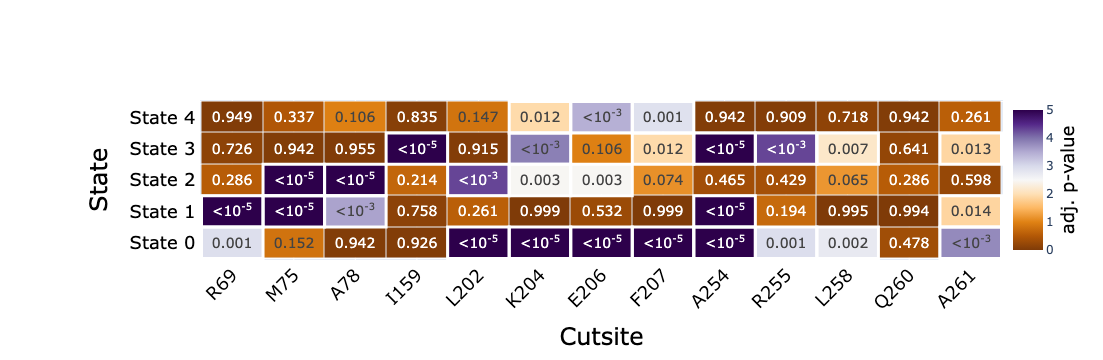

In [20]:
# Create a heatmap with cell borders
fig = go.Figure(data=go.Heatmap(
    z=log_z_values,
    x=x_labels,
    y=y_labels,
    colorscale="puor",
    showscale=True,
    xgap=1,  # Gap between cells on the x-axis (creates a border)
    ygap=1,   # Gap between cells on the y-axis (creates a border)
    text=text_values,  # Display p-values in cells
    texttemplate="%{text}",  # Format text in cells
    textfont=dict(size=14),  # Adjust font size and color for readability
    # zmin=0,  # Set minimum of color scale to 0
    # zmax=1,  # Set maximum of color scale to 1
    colorbar=dict(
        title="adj. p-value",
        title_side="right",
        titlefont=dict(size=18, color="black"),
        lenmode="fraction",
        len=1.0,
        y=0.5,
        yanchor="middle",
        x=1.0,
        xanchor="left"
    ),
))

# New code to add borders for significant cells
for i in range(len(y_labels)):
    for j in range(len(x_labels)):
        if z_values[i][j] < 0.05:

            fig.add_shape(
                type="rect",
                x0=j-0.5, y0=i-0.5, x1=j+0.5, y1=i+0.5,
                line=dict(color="white", width=3),
                fillcolor="rgba(0,0,0,0)",
                layer="above"
            )

# Update layout to ensure sufficient space and styling
fig.update_layout(
    xaxis=dict(
        title="Cutsite",
        titlefont=dict(size=24, color="black"),
        tickfont=dict(size=18, color="black"),
        tickangle=-45,
        tickmode='array',
        tickvals=x_labels,
        ticktext=x_labels
    ),
    yaxis=dict(
        title="State",
        titlefont=dict(size=24, color="black"),
        tickfont=dict(size=18, color="black"),
        ticklabelposition="outside",
        automargin=True,
        side="left",
        tickson="boundaries",
        ticklen=20,  # Increase tick length
        tickwidth=2,  # Increase tick width for visibility
        ticks="outside",  # Place ticks outside the plot area
        tickcolor="rgba(0,0,0,0)",  # Make ticks transparent
        linecolor="rgba(0,0,0,0)",  # Make axis line transparent
    ),

    margin=dict(l=200, r=100, t=100, b=100),  # Increase margins to ensure full rendering
    # width=1700,  # Set optimal width
    # height=500,   # Set optimal height
)


# Show the figure
fig.show()
# Save the figure as a high-resolution image
# fig.write_image("Simulation_LiPMS_consistent_heatmap.png", scale=10)

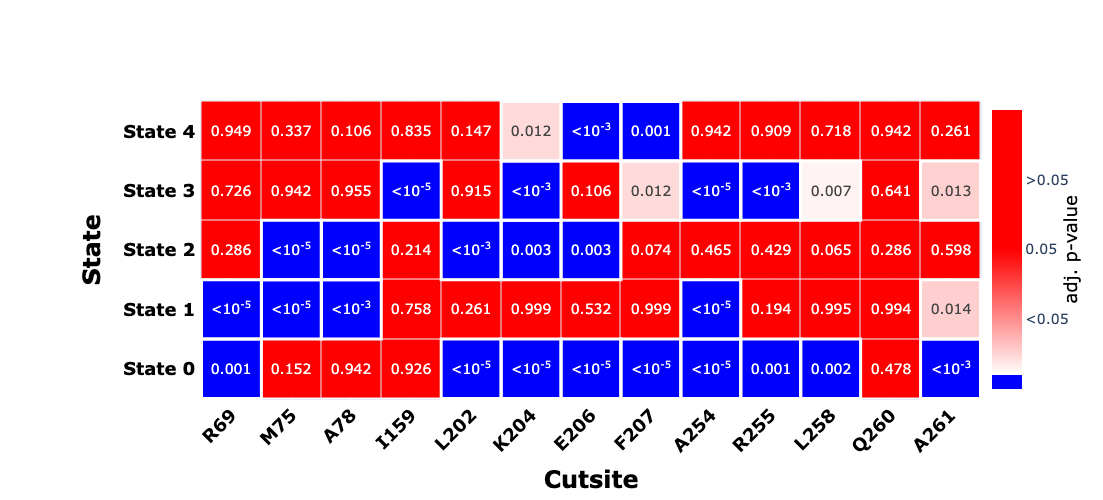

In [60]:
# Calculate the value for -log10(0.05)
white_threshold = -np.log10(0.05)

# Create a custom colorscale
colorscale = [
    [0, 'blue'],
    [0.049999, 'blue'],
    [0.05, 'white'],
    [0.50001, 'red'],
    [1, 'red']
]

# Create a heatmap with cell borders
fig = go.Figure(data=go.Heatmap(
    z=z_values,
    x=x_labels,
    y=y_labels,
    colorscale=colorscale,
    showscale=True,
    xgap=1,
    ygap=1,
    text=text_values,
    texttemplate="%{text}",
    textfont=dict(size=14),
    zmin=0,  # Set minimum of color scale to 0
    zmax= 0.1,#np.max(log_z_values),  # Set maximum to the highest value in log_z_values
    colorbar=dict(
        title="adj. p-value",
        title_side="right",
        titlefont=dict(size=18, color="black"),
        lenmode="fraction",
        len=1.0,
        y=0.5,
        yanchor="middle",
        x=1.0,
        xanchor="left",
        tickvals=[0.025, 0.05, 0.075],
        ticktext=['<0.05', '0.05', '>0.05'],
        tickfont=dict(size=14),
    ),
))

# New code to add borders for significant cells
for i in range(len(y_labels)):
    for j in range(len(x_labels)):
        if z_values[i][j] < 0.05:

            fig.add_shape(
                type="rect",
                x0=j-0.5, y0=i-0.5, x1=j+0.5, y1=i+0.5,
                line=dict(color="white", width=3),
                fillcolor="rgba(0,0,0,0)",
                layer="above"
            )

# Update layout to ensure sufficient space and styling
fig.update_layout(
    xaxis=dict(
        title="Cutsite",
        titlefont=dict(size=24, color="black", weight="bold"),
        tickfont=dict(size=18, color="black", weight="bold"),
        tickangle=-45,
        tickmode='array',
        tickvals=x_labels,
        ticktext=x_labels
    ),
    yaxis=dict(
        title="State",
        titlefont=dict(size=24, color="black", weight="bold"),
        tickfont=dict(size=18, color="black", weight="bold"),
        ticklabelposition="outside",
        automargin=True,
        side="left",
        tickson="boundaries",
        ticklen=20,  # Increase tick length
        tickwidth=2,  # Increase tick width for visibility
        ticks="outside",  # Place ticks outside the plot area
        tickcolor="rgba(0,0,0,0)",  # Make ticks transparent
        linecolor="rgba(0,0,0,0)",  # Make axis line transparent
    ),

    margin=dict(l=200, r=100, t=100, b=100),  # Increase margins to ensure full rendering
    width=1700,  # Set optimal width
    height=500,   # Set optimal height
)


# Show the figure
fig.show()
# Save the figure as a high-resolution image
fig.write_image("Simulation_LiPMS_consistent_heatmap.png", scale=10)

In [26]:
-np.log10(1)

-0.0

In [31]:
-np.log10(0.05)

1.3010299956639813